## Milestone 2 - Katie Perkins

For our project, in Milestone 1 I described how I would like to use the Water Potability dataset (https://www.kaggle.com/adityakadiwal/water-potability). I will most likely use the support-vector machine classifier and the XGBoost algorithm against it, along with a confusion matrix to test the accuracy of both. 

However, for Milestone 2, we will look at other notebooks posted by Kaggler's and review their methods and results. For Milestone 2, I ran the below notebook. The below notebook first reviews the data with various graphs and scatterplots. A scatter plot uses dots to represent values for two different numeric variables, in this case the potability marker. 

After delving into the data, the user imports various classifiers to test the data, such as Decision Tree, Random Forest, Logistic Regression, etc. This notebook is beginner friendly, and uses 7 models. 

Next the user uses hyper-parameter tuning to set parameters for each classifier, then fits the models and attempts to find the best parameters. Finally bagging and boosting is applied to each model, and each accuracy is noted with Random Forest in the lead at 82%. 

To finish up the notebook, a classification report printed which specifies the key metrics in a classification problem is printed. In this case, the precision of class 0 is 89% and class 1 is 90%. This means the model predicts 89% of class 0 and 90% of class 1 correctly. 


.

.

## 7 Models with params tuning- beginner friendly (Kaggle Notebook) 
https://www.kaggle.com/sohommajumder21/7-models-with-params-tuning-beginner-friendly/notebook

**Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.**

![Drink water](http://nextdayinspect.com/wp-content/uploads/2020/10/Water-Infographic-Human-Body-e1603490328306.jpg)

In [1]:
from google.colab import files
uploaded = files.upload()

Saving water_potability.csv to water_potability.csv


In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
#shape of the data
df.shape

(3276, 10)

There are 3276 rows and 10 columns

In [4]:
#Check for missing values
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
#Dropping missing values
#because water quality is a sensitive data, we cannot tamper with the data by imputing mean, median, mode
df= df.dropna()


In [6]:
df.Potability.value_counts()

0    1200
1     811
Name: Potability, dtype: int64

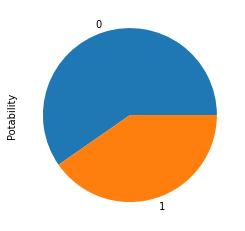

In [7]:
#Plots
import matplotlib.pyplot as plt
import seaborn as sns


df.Potability.value_counts().plot(kind ='pie')

Thus it is an imbalanced dataset, since 0 is much more 1 (1998>1278)
So we need to balance the data so that there is no biasedness.

In [8]:
zero  = df[df['Potability']==0]   #zero values in Potability column
one = df[df['Potability']==1]  # one values in Potability column
from sklearn.utils import resample
#minority class that  is 1, we need to upsample/increase that class so that there is no bias
#n_samples = 1998 means we want 1998 sample of class 1, since there are 1998 samples of class 0
df_minority_upsampled = resample(one, replace = True, n_samples = 1200) 
#concatenate
df = pd.concat([zero, df_minority_upsampled])

from sklearn.utils import shuffle
df = shuffle(df) # shuffling so that there is particular sequence

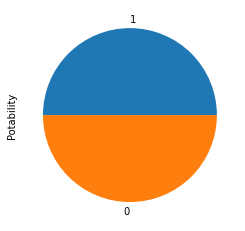

In [9]:
df.Potability.value_counts().plot(kind ='pie')

Now it's perfect!

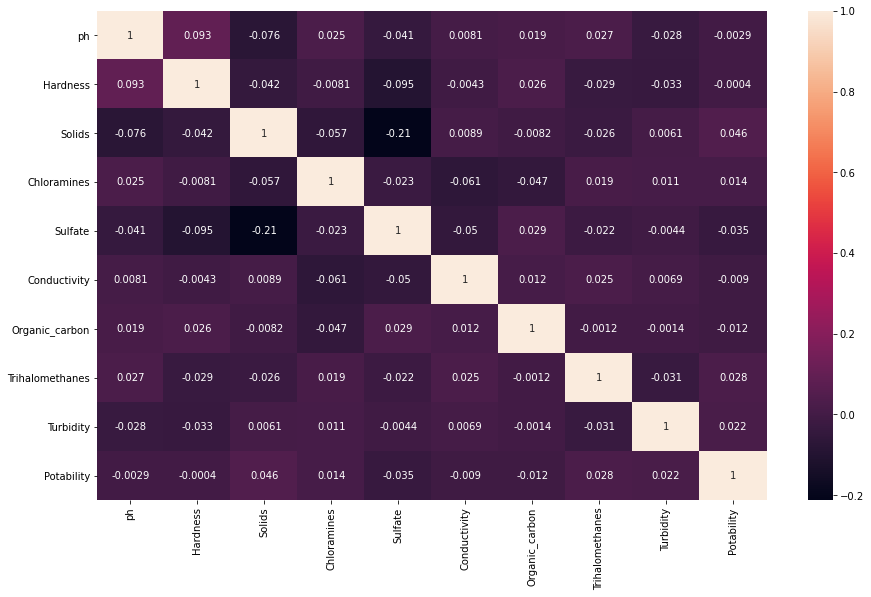

In [10]:
#understanding correlation
plt.figure(figsize = (15,9))
sns.heatmap(df.corr(), annot = True)

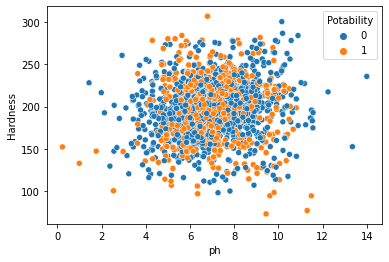

In [11]:
sns.scatterplot(x=df["ph"], y=df["Hardness"], hue=df.Potability,
data=df)


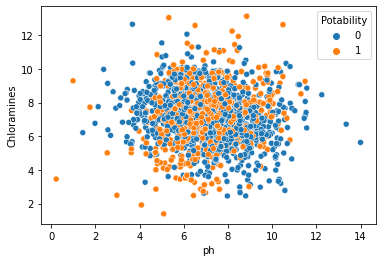

In [12]:
sns.scatterplot(x=df["ph"], y=df["Chloramines"], hue=df.Potability,
data=df)

There is no particular pattern!

In [13]:
df.corr().abs()['Potability'].sort_values(ascending = False)

Potability         1.000000
Solids             0.046430
Sulfate            0.034691
Trihalomethanes    0.028499
Turbidity          0.021652
Chloramines        0.014483
Organic_carbon     0.011997
Conductivity       0.009045
ph                 0.002914
Hardness           0.000398
Name: Potability, dtype: float64

highest correlation with Potability is solids with 5.24% only

In [14]:
X = df.drop(['Potability'], axis = 1)
y = df['Potability']

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features= X.columns
X[features] = sc.fit_transform(X[features])

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier


from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1)

## Hyper-parameter Tuning ;)

In [18]:
#Hyperparameter tuning ;)

lr = LogisticRegression(random_state=42)

knn = KNeighborsClassifier()

dt = DecisionTreeClassifier()

rf = RandomForestClassifier()

ada = AdaBoostClassifier()

xgb =XGBClassifier(eval_metric = 'logloss', use_label_encoder=False)


para_knn = {'n_neighbors':np.arange(1, 50)}  #parameters of knn
grid_knn = GridSearchCV(knn, param_grid=para_knn, cv=5) #search knn for 5 fold cross validation

#parameters for decision tree
para_dt = {'criterion':['gini','entropy'],'max_depth':np.arange(1, 50), 'min_samples_leaf':[1,2,4,5,10,20,30,40,80,100]}
grid_dt = GridSearchCV(dt, param_grid=para_dt, cv=5) #grid search decision tree for 5 fold cv
#"gini" for the Gini impurity and “entropy” for the information gain.
#min_samples_leaf: The minimum number of samples required to be at a leaf node, have the effect of smoothing the model

#parameters for random forest
#n_estimators: The number of trees in the forest.
params_rf = {'n_estimators':[100,200, 350, 500], 'min_samples_leaf':[2, 10, 30]}
grid_rf = GridSearchCV(rf, param_grid=params_rf, cv=5)

#parameters fpr AdaBoost
params_ada = {'n_estimators': [50,100,250,400,500,600], 'learning_rate': [0.2,0.5,0.8,1]}
grid_ada =  GridSearchCV(ada, param_grid=params_ada, cv=5)

#XGBoost
#parameters for xgboost
params_xgb = {'n_estimators': [50,100,250,400,600,800,1000], 'learning_rate': [0.2,0.5,0.8,1]}
rs_xgb =  RandomizedSearchCV(xgb, param_distributions=params_xgb, cv=5)


In [19]:
grid_knn.fit(X_train, y_train)
grid_dt.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)
grid_ada.fit(X_train, y_train)
rs_xgb.fit(X_train, y_train)

print("Best parameters for KNN:", grid_knn.best_params_)
print("Best parameters for Decision Tree:", grid_dt.best_params_)
print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best parameters for AdaBoost:", grid_ada.best_params_)
print("Best parameters for XGBoost:", rs_xgb.best_params_)

Best parameters for KNN: {'n_neighbors': 1}
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 49, 'min_samples_leaf': 1}
Best parameters for Random Forest: {'min_samples_leaf': 2, 'n_estimators': 500}
Best parameters for AdaBoost: {'learning_rate': 1, 'n_estimators': 600}
Best parameters for XGBoost: {'n_estimators': 1000, 'learning_rate': 1}


Wohohhhoooooo! We got the best parameters.

#### Applying bagging and boosting

In [20]:
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(criterion='entropy', max_depth=42, min_samples_leaf=1, random_state=42)
knn = KNeighborsClassifier(n_neighbors=1)
rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=2, random_state=42)
ada = AdaBoostClassifier(n_estimators= 600, learning_rate= 1 )
xgb = XGBClassifier(n_estimators= 250, learning_rate= 0.8)

#let's also apply bagging and boosting
bagging = BaggingClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=46, min_samples_leaf=2, random_state=42),
                           n_estimators = 100, random_state = 42)
bagging.fit(X_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='entropy',
                                                        max_depth=46,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=2,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=42,
 

In [21]:
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn),
               ('Decision Tree', dt), ('Random Forest', rf), ('AdaBoost', ada),
              ('Bagging Classifier', bagging), ('XGBoost', xgb)]


In [22]:
from sklearn.metrics import accuracy_score

for classifier_name, classifier in classifiers:
 
    # Fit clf to the training set
    classifier.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    

   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.2f}'.format(classifier_name, accuracy))

Logistic Regression : 0.49
K Nearest Neighbours : 0.78
Decision Tree : 0.75
Random Forest : 0.82
AdaBoost : 0.65
Bagging Classifier : 0.80
XGBoost : 0.77


Random Forest has performed better.

In [23]:
from sklearn.metrics import classification_report

y_pred_rf= rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.80      0.86      0.83       122
           1       0.84      0.77      0.81       118

    accuracy                           0.82       240
   macro avg       0.82      0.82      0.82       240
weighted avg       0.82      0.82      0.82       240



The precision of class 0 is 89% and that of class 1 is 90%
It means the model predicts 89% of class 0 and 90% of class 1 correctly

Accuracy is 89%

## Do upvote if you like it or fork it. This motivates us to produce more notebooks for the community.